# 第2章 感知机

## 1. 感知机模型

**定义**：
- 输入空间：$\mathcal{X}\subseteq R^n$
- 输出空间：$\mathcal{Y} = \{+1,-1\}$
- $x \in \mathcal{X}$：输入实例的特征向量
- $y \in \mathcal{Y}$: 输出实例的类别

由输入空间到输出空间的如下函数称为感知机：
$$
f(x)=sign(w \cdot x + b)
$$
其中$sign$为符号函数，定义如下：
$$
sign(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.
$$

线性方程$w \cdot x + b = 0$对应特征空间$R^n$中的一个超平面$S$，$w$是超平面的法向量，$b$是超平面的截距

感知机就是神经网络中一个简化版（输出为+1和-1二值）的神经元，是线性二分类模型，属于判别模型

## 2. 感知机学习策略

损失函数是误分类点到超平面$S$的总距离，定义如下：
$$
L(w,b)=-\sum_{x_i\in M}{y_i(w*x_i+b)}
$$
$M$为误分类点的集合

## 3. 感知机学习算法

(1) 原始形式

$L(w,b)$对$b$求偏导为：$\nabla_wL(w,b)=-\sum \limits_{x_i\in M}y_ix_i$

$L(w,b)$对$w$求偏导为：$\nabla_bL(w,b)=-\sum \limits_{x_i\in M}y_i$

随机选取一个误分类点$(x_i, y_i)$，对$w, b$进行更新：

$$w \leftarrow w + \eta y_ix_i$$
$$b \leftarrow b + \eta y_i$$

**算法2.1（随机梯度下降法）**

输入：训练数据集$T=[(x_1,y_1),...,(x_N,y_N)]$，学习率$\eta$

1. 选取初值$w_0, b_0$

2. 在训练集中选取数据$(x_i, y_i)$

3. 如果$y_i(w\bullet x_i+b) \le 0$:
$$w \leftarrow w+\eta y_ix_i$$
$$b \leftarrow b+\eta y_i$$
  
4. 转至2，直到训练集中没有误分类的点

输出：$w,b$

(2) 对偶形式

### 代码实现

使用iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
data = iris['data']
target = iris['target']

X = data[:100, :2]
Y = target[:100]
Y = np.array([1 if y == 1 else -1 for y in Y])
print('X shape', X.shape)
print('Y shape', Y.shape)

X shape (100, 2)
Y shape (100,)


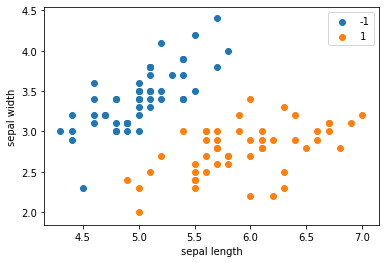

In [3]:
plt.scatter(X[:50, 0], X[:50, 1], label='-1')
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

In [4]:
class Model:
    def __init__(self):
        self.w = np.ones(2, dtype=np.float32)
        self.b = 0.0
        self.learning_rate = 0.1
        
    def fit(self, X_train, Y_train):
        ok = False
        while not ok:
            wrong_cnt = 0
            for i in range(len(X_train)):
                x = X_train[i]
                y = Y_train[i]
                if y * (np.dot(self.w, x) + self.b) <= 0:
                    self.w = self.w + self.learning_rate * np.dot(y, x)
                    self.b = self.b + self.learning_rate * y
                    wrong_cnt += 1
            if wrong_cnt == 0:
                ok = True
        print('fit finish!')

In [5]:
model = Model()
model.fit(X, Y)
print('w:', model.w)
print('b:', model.b)

fit finish!
w: [  7.8 -10. ]
b: -12.1


绘制超平面（直线）

$$w_0x_0+w_1x_1+b=0 \\
\Rightarrow w_0x+w_1y+b=0 \\
\Rightarrow y=-\frac{1}{w_1}(w_0x+b)$$

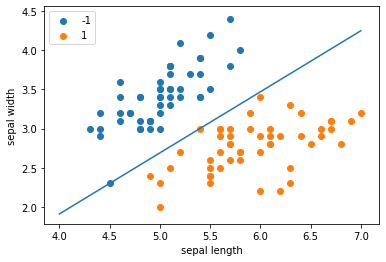

In [6]:
line_x = np.linspace(4, 7, 10)
line_y = -(model.w[0] * line_x + model.b) / model.w[1]
plt.plot(line_x, line_y)

plt.scatter(X[:50, 0], X[:50, 1], label='-1')
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

### scikit-learn代码

In [7]:
from sklearn.linear_model import Perceptron

In [8]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(X, Y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [9]:
print('w:', clf.coef_)
print('b:', clf.intercept_)

w: [[  74.6 -127.2]]
b: [ 0.]


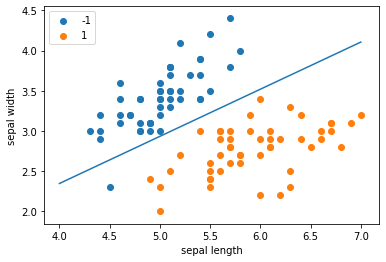

In [10]:
line_x = np.linspace(4, 7, 10)
line_y = -(clf.coef_[0][0] * line_x + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(line_x, line_y)

plt.scatter(X[:50, 0], X[:50, 1], label='-1')
plt.scatter(X[50:100, 0], X[50:100, 1], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()